In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import math
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))


sns.set()
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

f = pd.read_csv("seoul_bus_route.csv", dtype='str')
f.columns = ["route_id", "route_name", "index", "section_id", "station_id", "ARS_id", "station_name", "longitude", "latitude"]

def get_district(arsid):
    districts = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
    prefix_2 = int(arsid[:2])
    idx = prefix_2 - 1
    
    return districts[idx]

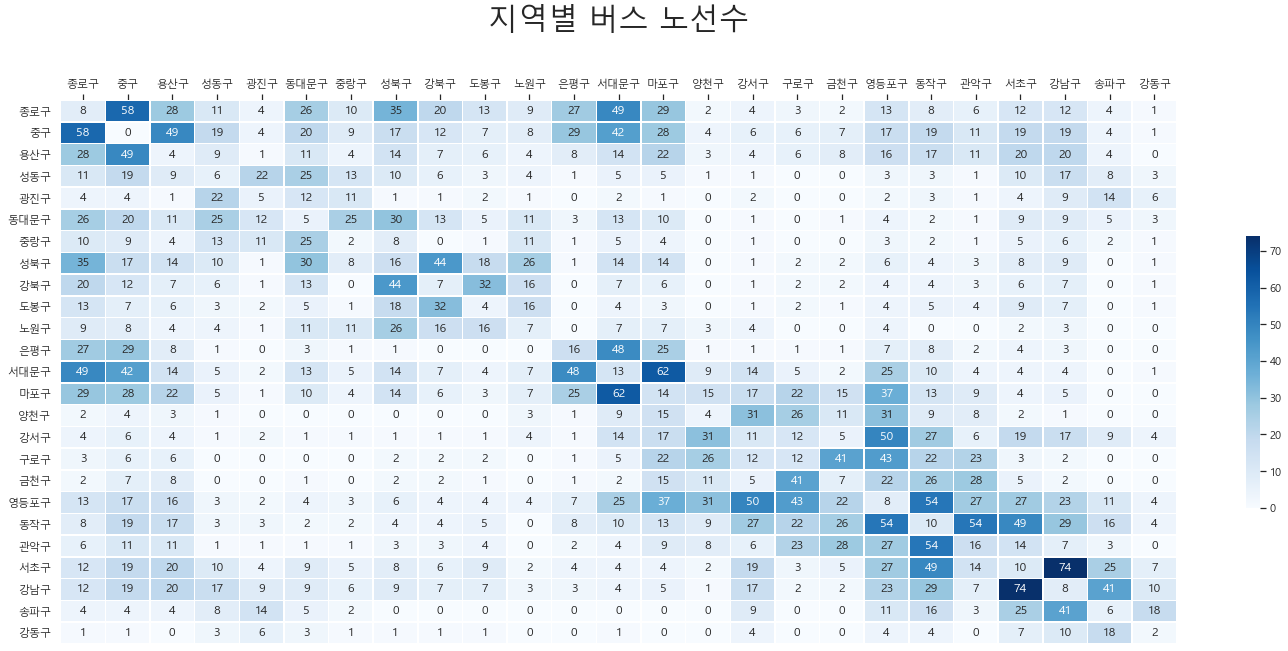

In [18]:
routes_table = {}

for i in range(len(f)):
    routeId = f.route_id[i]
    arsId = f.ARS_id[i]
    if f.route_name[i].startswith('N'):
        continue
    if not arsId.startswith('0') and not arsId.startswith('1') and not arsId.startswith('20') and not arsId.startswith('21') and not arsId.startswith('22') and not arsId.startswith('23') and not arsId.startswith('24') and not arsId.startswith('25'):
        continue
    else:
        district = get_district(arsId)
    if routeId in routes_table:
        if district not in locations:
            locations.append(district)
    else:
        locations = [district]
        routes_table[routeId] = locations
        
        
dic = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        dic[d[i] + '-' + d[j]] = 0

l = list(routes_table.values())


for i in range(len(l)):
    if len(l[i]) == 1:
        dic[l[i][0] + '-' + l[i][0]] += 1
    else:
        for x in range(len(l[i])):
            for y in range(x+1, len(l[i])):
                dic[l[i][x] + '-' + l[i][y]] += 1
        temp = list(reversed(l[i]))
        for x in range(len(temp)):
            for y in range(x+1, len(temp)):
                dic[temp[x] + '-' + temp[y]] += 1


total_route_data = []
for di in d:
    routings = []
    for k in dic:
        if k.startswith(di):
            routings.append(dic[k])
    total_route_data.append(list(routings))

pd.set_option('display.max_row', 25)
pd.set_option('display.max_columns', 25)

df1 = pd.DataFrame(total_route_data,
                  index = d,
                  columns = d)

plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(df1, annot=True, cmap='Blues', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 버스 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()



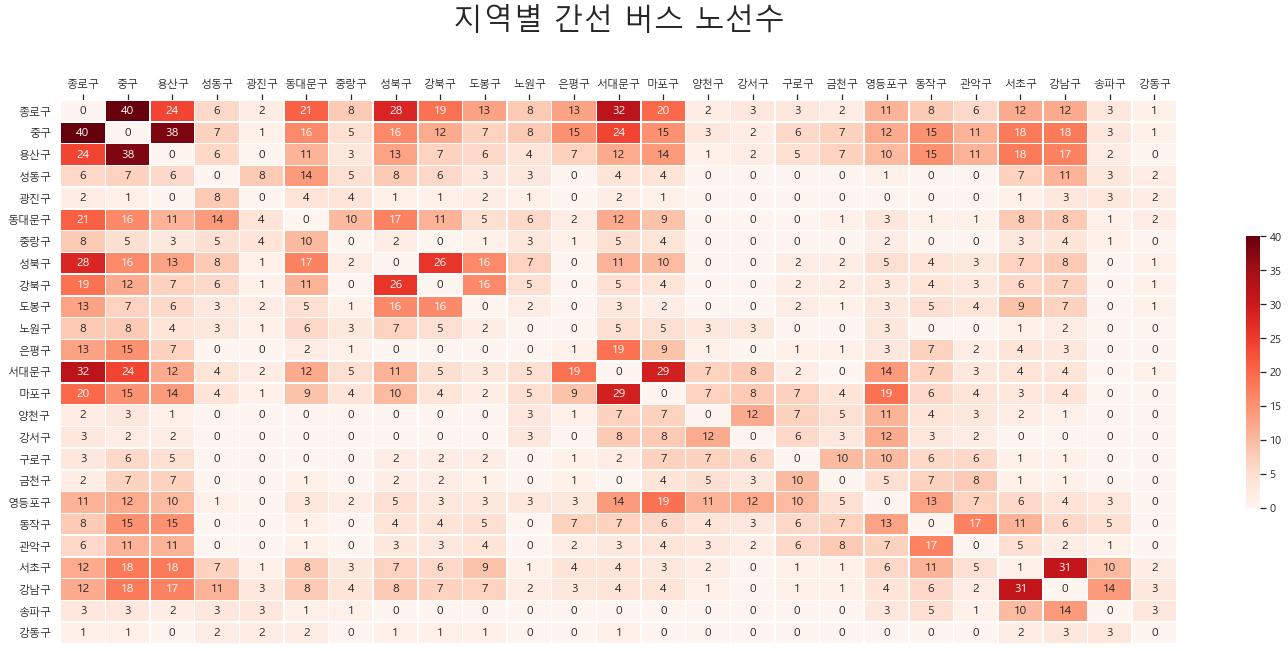

In [19]:
trunk_table = {}

for i in range(len(f)):
    only_num = ""
    if '-' in f.route_name[i] or f.route_name[i][0] == 'N':
        continue
    for char in f.route_name[i]:
        if char == 'A' or char == 'B':
            break
        only_num += char
    if len(only_num) == 3:
        routeId = f.route_id[i]
        arsId = f.ARS_id[i]
        if f.route_name[i].startswith('N'):
            continue
        if not arsId.startswith('0') and not arsId.startswith('1') and not arsId.startswith('20') and not arsId.startswith('21') and not arsId.startswith('22') and not arsId.startswith('23') and not arsId.startswith('24') and not arsId.startswith('25'):
            continue
        else:
            district = get_district(arsId)
        if routeId in trunk_table:
            if district not in locations:
                locations.append(district)
        else:
            locations = [district]
            trunk_table[routeId] = locations
        
        
trunk_dic = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        trunk_dic[d[i] + '-' + d[j]] = 0

l = list(trunk_table.values())


for i in range(len(l)):
    if len(l[i]) == 1:
        trunk_dic[l[i][0] + '-' + l[i][0]] += 1
    else:
        for x in range(len(l[i])):
            for y in range(x+1, len(l[i])):
                trunk_dic[l[i][x] + '-' + l[i][y]] += 1
        temp = list(reversed(l[i]))
        for x in range(len(temp)):
            for y in range(x+1, len(temp)):
                trunk_dic[temp[x] + '-' + temp[y]] += 1


trunk_route_data = []
for di in d:
    routings = []
    for k in trunk_dic:
        if k.startswith(di):
            routings.append(trunk_dic[k])
    trunk_route_data.append(list(routings))

pd.set_option('display.max_row', 25)
pd.set_option('display.max_columns', 25)

trunk_df = pd.DataFrame(trunk_route_data,
                  index = d,
                  columns = d)

plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(trunk_df, annot=True, cmap='Reds', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 간선 버스 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

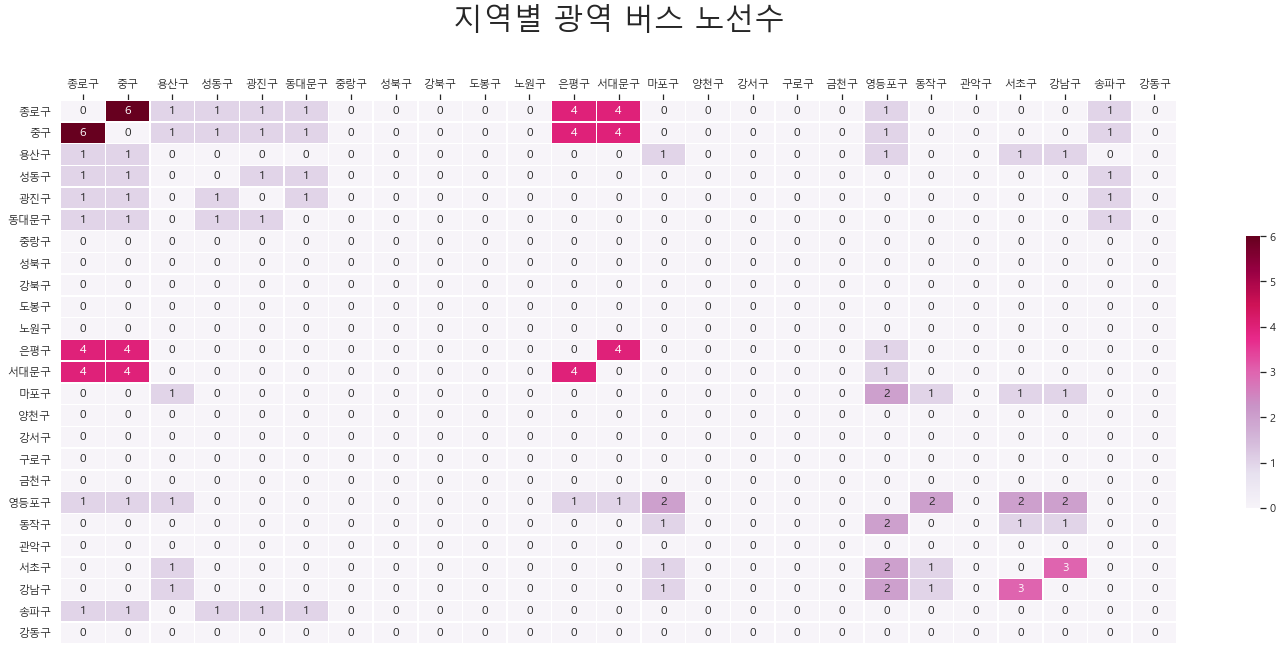

In [20]:
wide_area_table = {}

for i in range(len(f)):
    only_num = ""
    if '-' in f.route_name[i] or f.route_name[i][0] == 'N':
        continue
    for char in f.route_name[i]:
        if char == 'A' or char == 'B':
            break
        only_num += char
    if len(only_num) == 4 and only_num[0] == '9':
        routeId = f.route_id[i]
        arsId = f.ARS_id[i]
        if f.route_name[i].startswith('N'):
            continue
        if not arsId.startswith('0') and not arsId.startswith('1') and not arsId.startswith('20') and not arsId.startswith('21') and not arsId.startswith('22') and not arsId.startswith('23') and not arsId.startswith('24') and not arsId.startswith('25'):
            continue
        else:
            district = get_district(arsId)
        if routeId in wide_area_table:
            if district not in locations:
                locations.append(district)
        else:
            locations = [district]
            wide_area_table[routeId] = locations
        
        
wide_area_dic = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        wide_area_dic[d[i] + '-' + d[j]] = 0

l = list(wide_area_table.values())


for i in range(len(l)):
    if len(l[i]) == 1:
        wide_area_dic[l[i][0] + '-' + l[i][0]] += 1
    else:
        for x in range(len(l[i])):
            for y in range(x+1, len(l[i])):
                wide_area_dic[l[i][x] + '-' + l[i][y]] += 1
        temp = list(reversed(l[i]))
        for x in range(len(temp)):
            for y in range(x+1, len(temp)):
                wide_area_dic[temp[x] + '-' + temp[y]] += 1


wide_area_route_data = []
for di in d:
    routings = []
    for k in wide_area_dic:
        if k.startswith(di):
            routings.append(wide_area_dic[k])
    wide_area_route_data.append(list(routings))

pd.set_option('display.max_row', 25)
pd.set_option('display.max_columns', 25)

wide_area_df = pd.DataFrame(wide_area_route_data,
                  index = d,
                  columns = d)

plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(wide_area_df, annot=True, cmap='PuRd', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 광역 버스 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

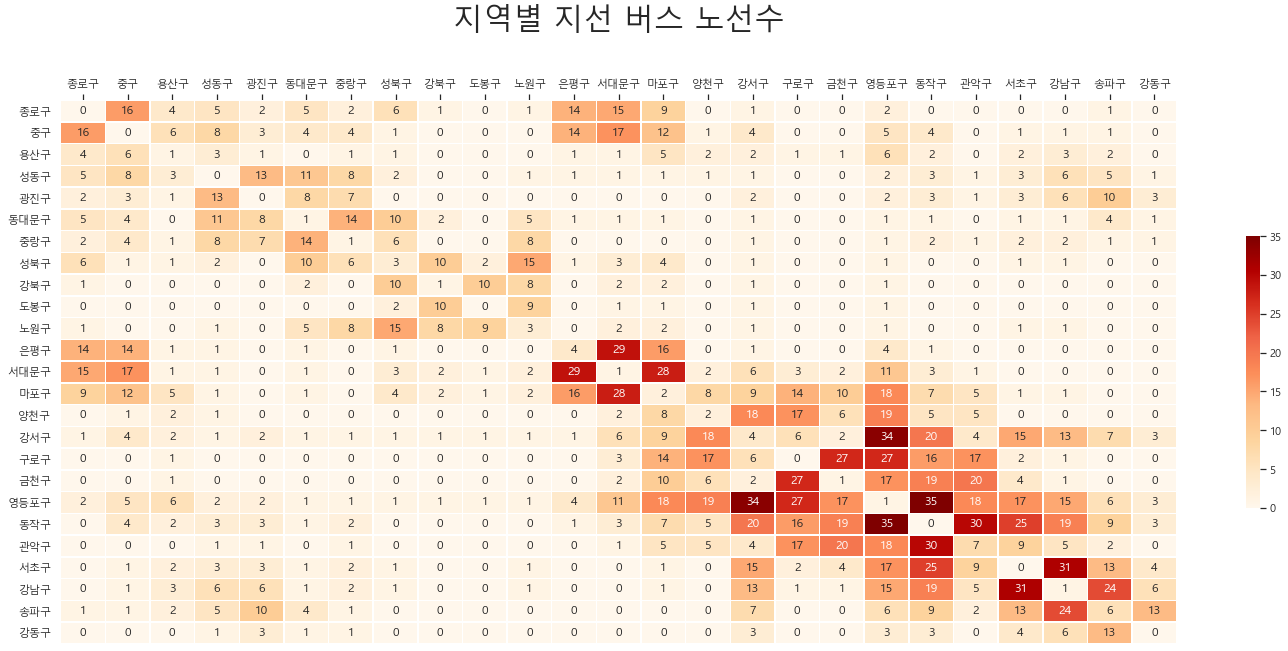

In [21]:
branch_table = {}

for i in range(len(f)):
    only_num = ""
    if '-' in f.route_name[i] or f.route_name[i][0] == 'N':
        continue
    for char in f.route_name[i]:
        if char == 'A' or char == 'B':
            break
        only_num += char
    if len(only_num) == 4 and only_num[0].isdigit() and only_num[0] != 9:
        routeId = f.route_id[i]
        arsId = f.ARS_id[i]
        if f.route_name[i].startswith('N'):
            continue
        if not arsId.startswith('0') and not arsId.startswith('1') and not arsId.startswith('20') and not arsId.startswith('21') and not arsId.startswith('22') and not arsId.startswith('23') and not arsId.startswith('24') and not arsId.startswith('25'):
            continue
        else:
            district = get_district(arsId)
        if routeId in branch_table:
            if district not in locations:
                locations.append(district)
        else:
            locations = [district]
            branch_table[routeId] = locations
        
        
branch_dic = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        branch_dic[d[i] + '-' + d[j]] = 0

l = list(branch_table.values())


for i in range(len(l)):
    if len(l[i]) == 1:
        branch_dic[l[i][0] + '-' + l[i][0]] += 1
    else:
        for x in range(len(l[i])):
            for y in range(x+1, len(l[i])):
                branch_dic[l[i][x] + '-' + l[i][y]] += 1
        temp = list(reversed(l[i]))
        for x in range(len(temp)):
            for y in range(x+1, len(temp)):
                branch_dic[temp[x] + '-' + temp[y]] += 1


branch_route_data = []
for di in d:
    routings = []
    for k in branch_dic:
        if k.startswith(di):
            routings.append(branch_dic[k])
    branch_route_data.append(list(routings))

pd.set_option('display.max_row', 25)
pd.set_option('display.max_columns', 25)

branch_df = pd.DataFrame(branch_route_data,
                  index = d,
                  columns = d)

plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(branch_df, annot=True, cmap='OrRd', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 지선 버스 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

In [22]:

f2 = pd.read_csv("routes_od_20210321.csv", dtype='str', encoding='cp949')
f2.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

f3 = pd.read_csv("routes_od_20210320.csv", dtype='str', encoding='cp949')
f3.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

f4 = pd.read_csv("routes_od_20210316.csv", dtype='str', encoding='cp949')
f4.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

f5 = pd.read_csv("routes_od_20210216.csv", dtype='str', encoding='cp949')
f5.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

f6 = pd.read_csv("routes_od_20210220.csv", dtype='str', encoding='cp949')
f6.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

f7 = pd.read_csv("routes_od_20210221.csv", dtype='str', encoding='cp949')
f7.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

dic2 = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        dic2[d[i] + '-' + d[j]] = 0

def operation(file):
    for i in range(len(file)):
        if type(file.geton_arsId[i]) == float or type(file.getoff_arsId[i]) == float:
            continue
        if not file.geton_arsId[i].startswith('0') and not file.geton_arsId[i].startswith('1') and not file.geton_arsId[i].startswith('20') and not file.geton_arsId[i].startswith('21') and not file.geton_arsId[i].startswith('22') and not file.geton_arsId[i].startswith('23') and not file.geton_arsId[i].startswith('24') and not file.geton_arsId[i].startswith('25'):
            continue
        if not file.getoff_arsId[i].startswith('0') and not file.getoff_arsId[i].startswith('1') and not file.getoff_arsId[i].startswith('20') and not file.getoff_arsId[i].startswith('21') and not file.getoff_arsId[i].startswith('22') and not file.getoff_arsId[i].startswith('23') and not file.getoff_arsId[i].startswith('24') and not file.getoff_arsId[i].startswith('25'):
            continue
        if file.geton_arsId[i][:2] == file.getoff_arsId[i][:2]:
            continue
        ride = get_district(file.geton_arsId[i])
        quit = get_district(file.getoff_arsId[i])
        passengers = int(file.cnt[i])
        route = f"{ride}-{quit}"
        dic2[route] += passengers

operation(f2)
operation(f3)
operation(f4)
operation(f5)
operation(f6)
operation(f7)

# for k in dic2:
#     print(k, dic2[k])


for k in dic2:
    dic2[k] /= 6
    dic2[k] = round(dic2[k], 3)


total_passenger_data = []
for di in d:
    movings = []
    for k in dic2:
        if k.startswith(di):
            movings.append(dic2[k])
    total_passenger_data.append(list(movings))
    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

df2 = pd.DataFrame(total_passenger_data, index = d, columns = d)


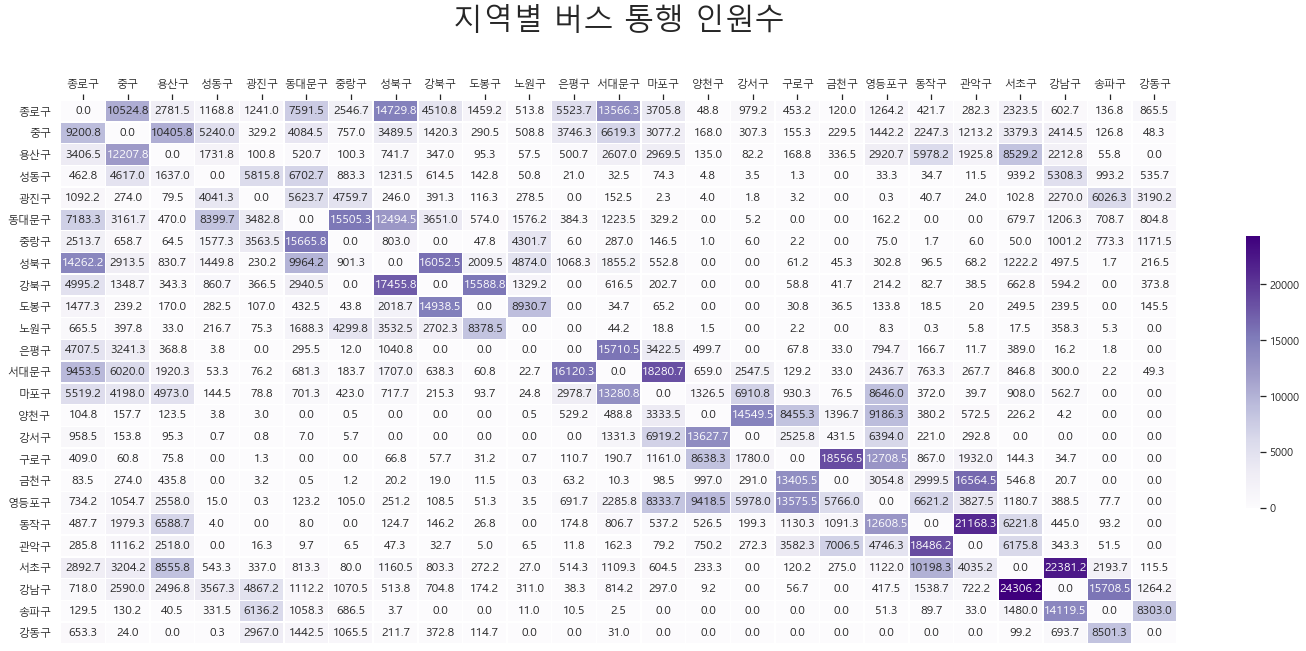

In [23]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(df2, annot = True, cmap = "Purples", fmt='.1f', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 버스 통행 인원수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

In [24]:
f2 = pd.read_csv("routes_od_20210321.csv", dtype='str', encoding='cp949')
f2.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f3 = pd.read_csv("routes_od_20210320.csv", dtype='str', encoding='cp949')
# f3.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f4 = pd.read_csv("routes_od_20210316.csv", dtype='str', encoding='cp949')
# f4.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f5 = pd.read_csv("routes_od_20210216.csv", dtype='str', encoding='cp949')
# f5.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f6 = pd.read_csv("routes_od_20210220.csv", dtype='str', encoding='cp949')
# f6.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f7 = pd.read_csv("routes_od_20210221.csv", dtype='str', encoding='cp949')
# f7.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

trunk_table = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        trunk_table[d[i] + '-' + d[j]] = 0

def operation(file):
    for i in range(len(file)):
        if type(file.route_name[i]) == float:
            continue
        only_num = ""
        if '-' in file.route_name[i] or file.route_name[i][0] == 'N':
            continue
        for char in file.route_name[i]:
            if char == 'A' or char == 'B':
                break
            only_num += char
        if len(only_num) == 3:
            if type(file.geton_arsId[i]) == float or type(file.getoff_arsId[i]) == float:
                continue
            if not file.geton_arsId[i].startswith('0') and not file.geton_arsId[i].startswith('1') and not file.geton_arsId[i].startswith('20') and not file.geton_arsId[i].startswith('21') and not file.geton_arsId[i].startswith('22') and not file.geton_arsId[i].startswith('23') and not file.geton_arsId[i].startswith('24') and not file.geton_arsId[i].startswith('25'):
                continue
            if not file.getoff_arsId[i].startswith('0') and not file.getoff_arsId[i].startswith('1') and not file.getoff_arsId[i].startswith('20') and not file.getoff_arsId[i].startswith('21') and not file.getoff_arsId[i].startswith('22') and not file.getoff_arsId[i].startswith('23') and not file.getoff_arsId[i].startswith('24') and not file.getoff_arsId[i].startswith('25'):
                continue
            if file.geton_arsId[i][:2] == file.getoff_arsId[i][:2]:
                continue
            ride = get_district(file.geton_arsId[i])
            quit = get_district(file.getoff_arsId[i])
            passengers = int(file.cnt[i])
            route = f"{ride}-{quit}"
            trunk_table[route] += passengers

operation(f2)
operation(f3)
operation(f4)
operation(f5)
operation(f6)
operation(f7)


for k in trunk_table:
    trunk_table[k] /= 6
    trunk_table[k] = round(trunk_table[k], 3)


trunk_passenger_data = []
for di in d:
    movings = []
    for k in trunk_table:
        if k.startswith(di):
            movings.append(trunk_table[k])
    trunk_passenger_data.append(list(movings))
    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

trunk_df = pd.DataFrame(trunk_passenger_data, index = d, columns = d)

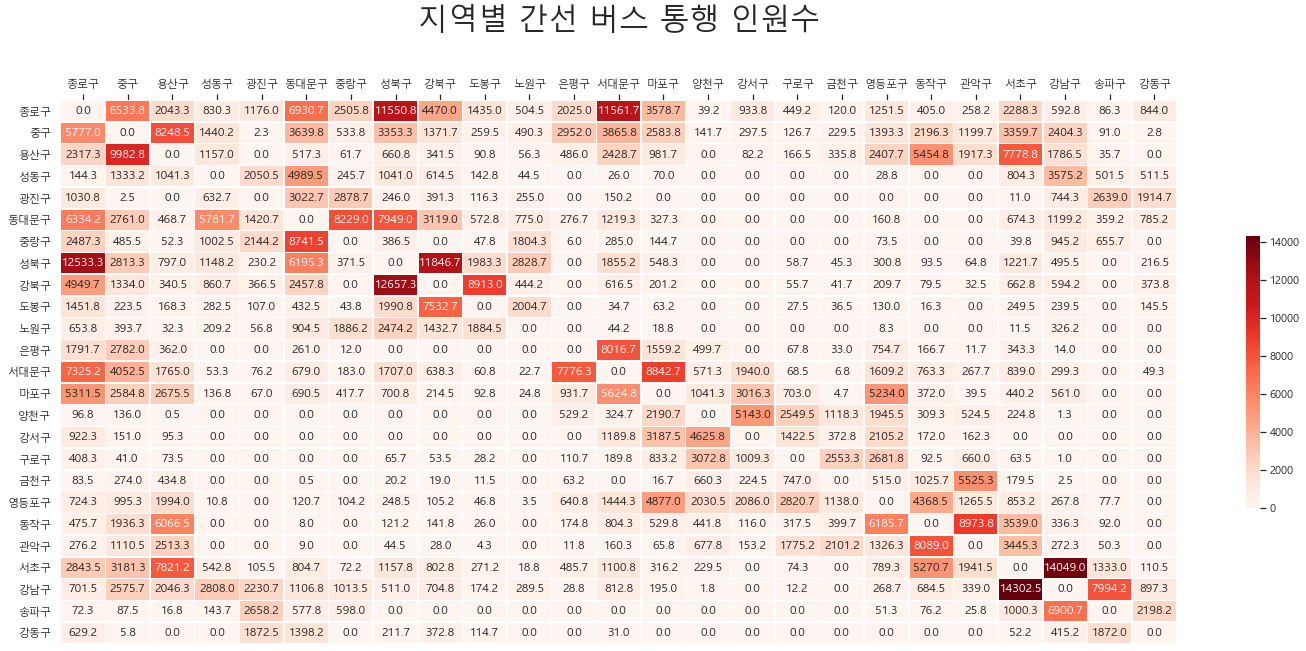

In [25]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(trunk_df, annot = True, cmap = "Reds", fmt='.1f', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 간선 버스 통행 인원수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

In [26]:
# f2 = pd.read_csv("routes_od_20210321.csv", dtype='str', encoding='cp949')
# f2.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f3 = pd.read_csv("routes_od_20210320.csv", dtype='str', encoding='cp949')
# f3.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f4 = pd.read_csv("routes_od_20210316.csv", dtype='str', encoding='cp949')
# f4.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f5 = pd.read_csv("routes_od_20210216.csv", dtype='str', encoding='cp949')
# f5.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f6 = pd.read_csv("routes_od_20210220.csv", dtype='str', encoding='cp949')
# f6.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f7 = pd.read_csv("routes_od_20210221.csv", dtype='str', encoding='cp949')
# f7.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

wide_area_table = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        wide_area_table[d[i] + '-' + d[j]] = 0

def operation(file):
    for i in range(len(file)):
        if type(file.route_name[i]) == float:
            continue
        only_num = ""
        if '-' in file.route_name[i] or file.route_name[i][0] == 'N':
            continue
        for char in file.route_name[i]:
            if char == 'A' or char == 'B':
                break
            only_num += char
        if len(only_num) == 4 and only_num[0] == '9':
            if type(file.geton_arsId[i]) == float or type(file.getoff_arsId[i]) == float:
                continue
            if not file.geton_arsId[i].startswith('0') and not file.geton_arsId[i].startswith('1') and not file.geton_arsId[i].startswith('20') and not file.geton_arsId[i].startswith('21') and not file.geton_arsId[i].startswith('22') and not file.geton_arsId[i].startswith('23') and not file.geton_arsId[i].startswith('24') and not file.geton_arsId[i].startswith('25'):
                continue
            if not file.getoff_arsId[i].startswith('0') and not file.getoff_arsId[i].startswith('1') and not file.getoff_arsId[i].startswith('20') and not file.getoff_arsId[i].startswith('21') and not file.getoff_arsId[i].startswith('22') and not file.getoff_arsId[i].startswith('23') and not file.getoff_arsId[i].startswith('24') and not file.getoff_arsId[i].startswith('25'):
                continue
            if file.geton_arsId[i][:2] == file.getoff_arsId[i][:2]:
                continue
            ride = get_district(file.geton_arsId[i])
            quit = get_district(file.getoff_arsId[i])
            passengers = int(file.cnt[i])
            route = f"{ride}-{quit}"
            wide_area_table[route] += passengers

operation(f2)
operation(f3)
operation(f4)
operation(f5)
operation(f6)
operation(f7)


for k in wide_area_table:
    wide_area_table[k] /= 6
    wide_area_table[k] = round(wide_area_table[k], 3)


wide_area_passenger_data = []
for di in d:
    movings = []
    for k in wide_area_table:
        if k.startswith(di):
            movings.append(wide_area_table[k])
    wide_area_passenger_data.append(list(movings))
    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

wide_area_df = pd.DataFrame(wide_area_passenger_data, index = d, columns = d)

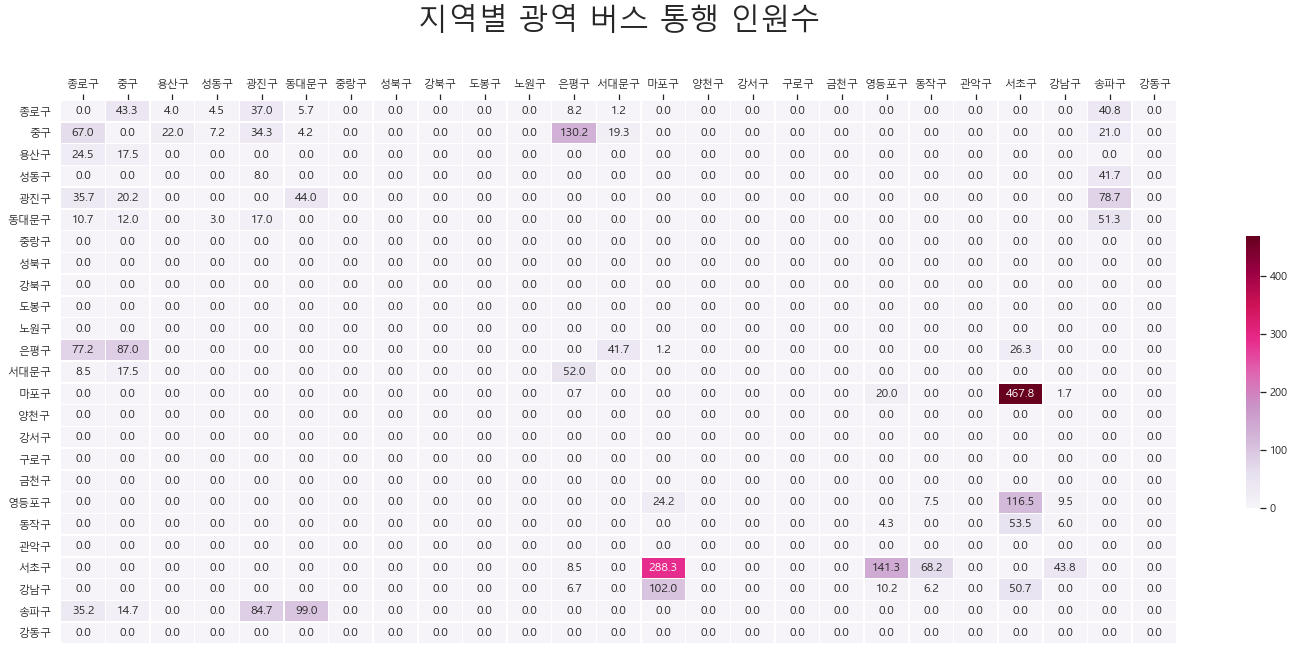

In [27]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(wide_area_df, annot = True, cmap = "PuRd", fmt='.1f', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 광역 버스 통행 인원수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

In [28]:
# f2 = pd.read_csv("routes_od_20210321.csv", dtype='str', encoding='cp949')
# f2.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f3 = pd.read_csv("routes_od_20210320.csv", dtype='str', encoding='cp949')
# f3.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f4 = pd.read_csv("routes_od_20210316.csv", dtype='str', encoding='cp949')
# f4.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f5 = pd.read_csv("routes_od_20210216.csv", dtype='str', encoding='cp949')
# f5.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f6 = pd.read_csv("routes_od_20210220.csv", dtype='str', encoding='cp949')
# f6.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

# f7 = pd.read_csv("routes_od_20210221.csv", dtype='str', encoding='cp949')
# f7.columns = ["date", "route_name", "geton_arsId", "geton_station_name", "getoff_arsId", "getoff_station_name", "geton_idx", "getoff_idx", "cnt"]

branch_table = {}
d = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
for i in range(len(d)):
    for j in range(len(d)):
        branch_table[d[i] + '-' + d[j]] = 0

def operation(file):
    for i in range(len(file)):
        if type(file.route_name[i]) == float:
            continue
        only_num = ""
        if '-' in file.route_name[i] or file.route_name[i][0] == 'N':
            continue
        for char in file.route_name[i]:
            if char == 'A' or char == 'B':
                break
            only_num += char
        if len(only_num) == 4 and only_num[0].isdigit() and only_num[0] != '9':
            if type(file.geton_arsId[i]) == float or type(file.getoff_arsId[i]) == float:
                continue
            if not file.geton_arsId[i].startswith('0') and not file.geton_arsId[i].startswith('1') and not file.geton_arsId[i].startswith('20') and not file.geton_arsId[i].startswith('21') and not file.geton_arsId[i].startswith('22') and not file.geton_arsId[i].startswith('23') and not file.geton_arsId[i].startswith('24') and not file.geton_arsId[i].startswith('25'):
                continue
            if not file.getoff_arsId[i].startswith('0') and not file.getoff_arsId[i].startswith('1') and not file.getoff_arsId[i].startswith('20') and not file.getoff_arsId[i].startswith('21') and not file.getoff_arsId[i].startswith('22') and not file.getoff_arsId[i].startswith('23') and not file.getoff_arsId[i].startswith('24') and not file.getoff_arsId[i].startswith('25'):
                continue
            if file.geton_arsId[i][:2] == file.getoff_arsId[i][:2]:
                continue
            ride = get_district(file.geton_arsId[i])
            quit = get_district(file.getoff_arsId[i])
            passengers = int(file.cnt[i])
            route = f"{ride}-{quit}"
            branch_table[route] += passengers

operation(f2)
operation(f3)
operation(f4)
operation(f5)
operation(f6)
operation(f7)


for k in branch_table:
    branch_table[k] /= 6
    branch_table[k] = round(branch_table[k], 3)


branch_passenger_data = []
for di in d:
    movings = []
    for k in branch_table:
        if k.startswith(di):
            movings.append(branch_table[k])
    branch_passenger_data.append(list(movings))
    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

branch_df = pd.DataFrame(branch_passenger_data, index = d, columns = d)

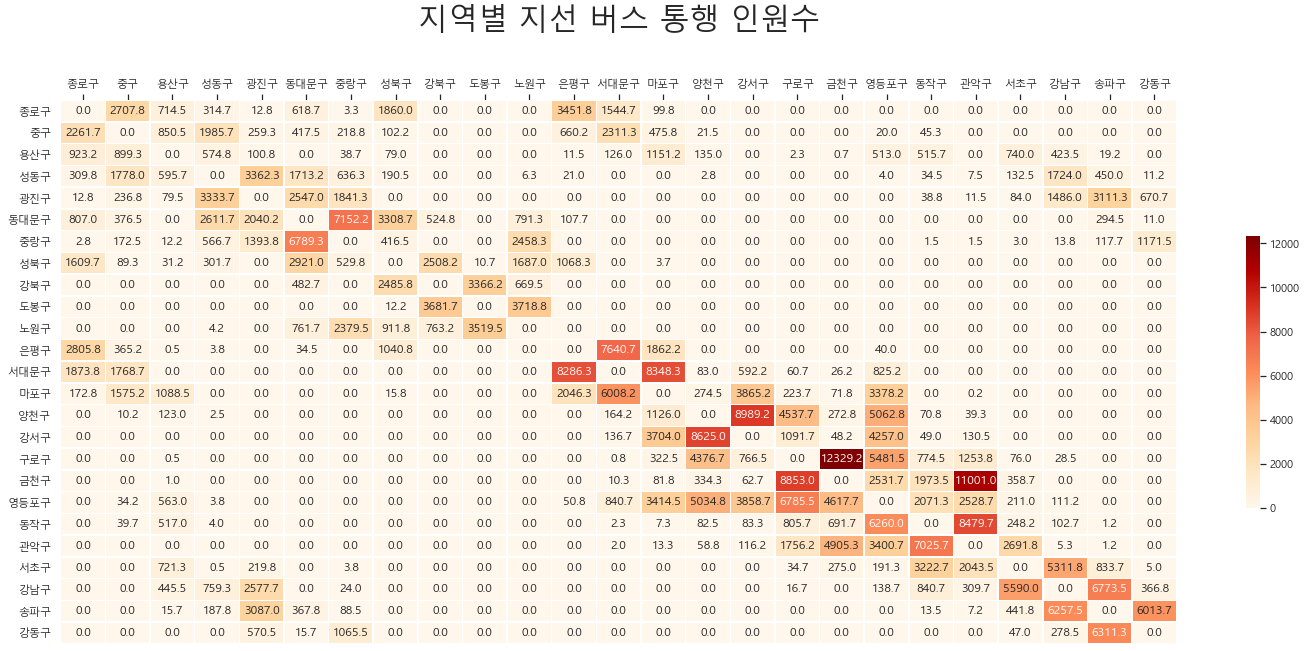

In [29]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(branch_df, annot = True, cmap = "OrRd", fmt='.1f', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 지선 버스 통행 인원수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

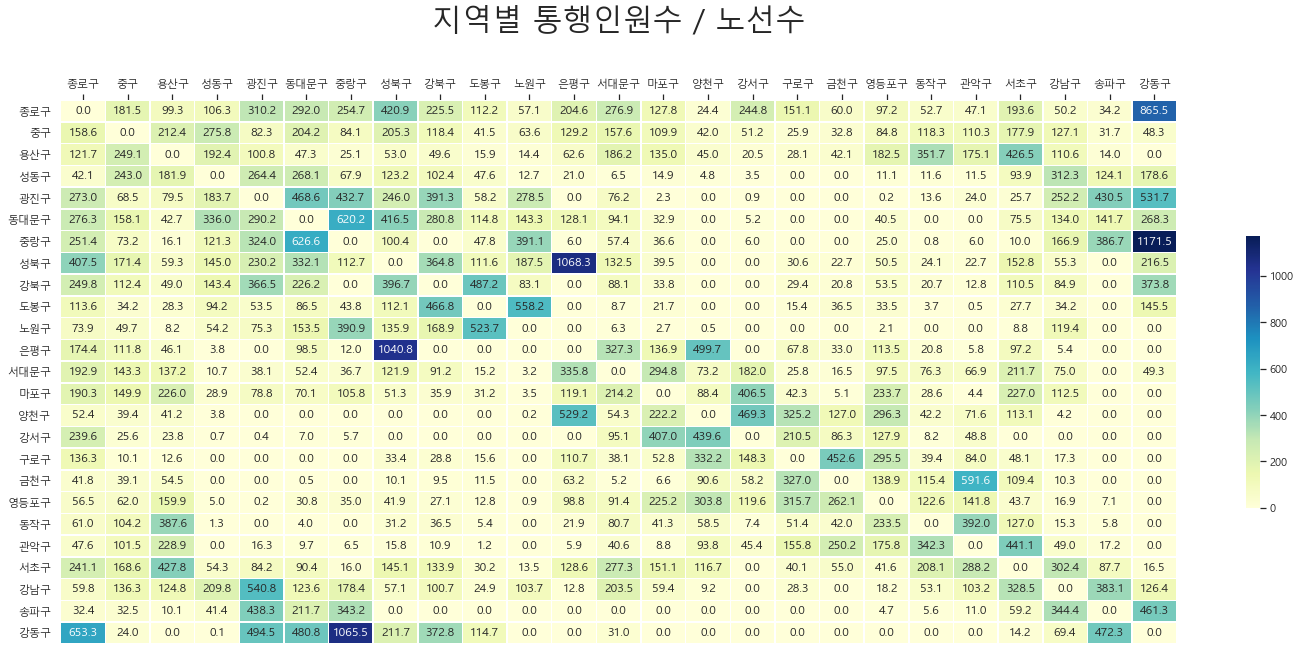

In [30]:
total_data = []

for i in range(25):
    tmp = []
    for j in range(25):
        if total_passenger_data[i][j] == 0.0 or total_route_data[i][j] == 0:
            tmp.append(0.0)
            continue
        res = round(total_passenger_data[i][j] / total_route_data[i][j],3)
        tmp.append(res)
    total_data.append(tmp)
    

    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

total_df = pd.DataFrame(total_data, index = d, columns = d)


plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(total_df, annot = True, cmap = "YlGnBu", fmt='.1f', linewidth = 0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 통행인원수 / 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()
        

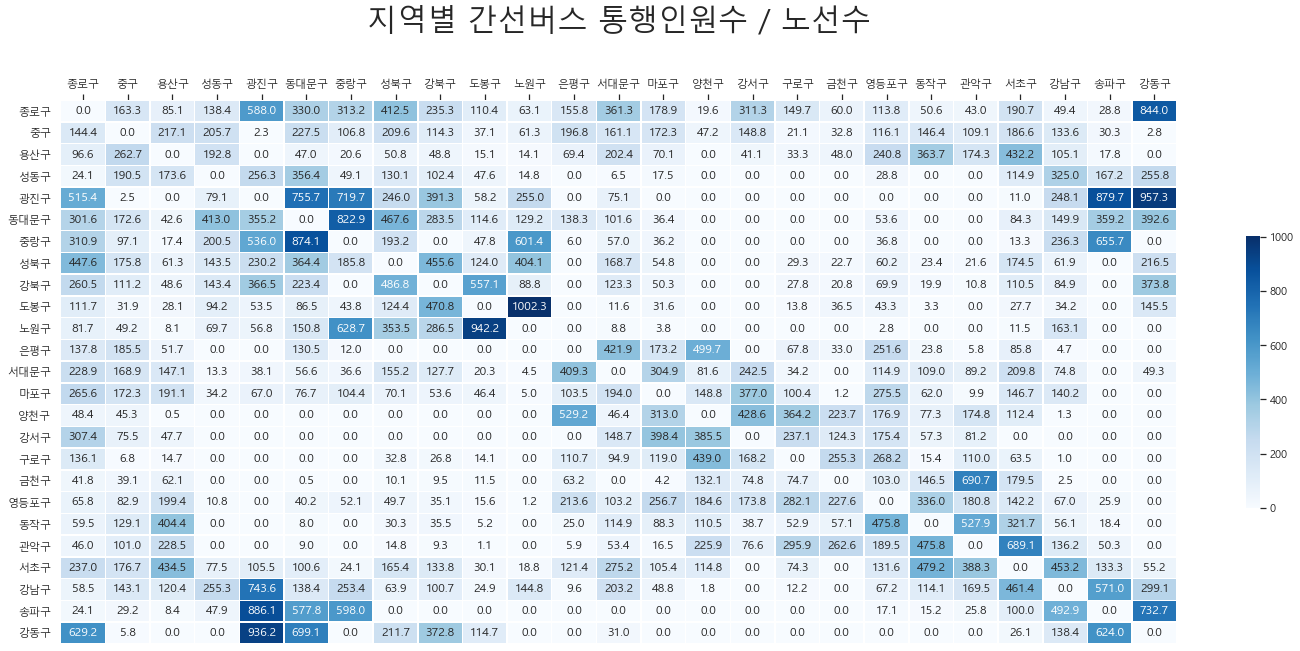

In [31]:
congestion_trunk_data = []

for i in range(25):
    tmp = []
    for j in range(25):
        if trunk_passenger_data[i][j] == 0.0 or trunk_route_data[i][j] == 0:
            tmp.append(0.0)
            continue
        res = round(trunk_passenger_data[i][j] / trunk_route_data[i][j],3)
        tmp.append(res)
    congestion_trunk_data.append(tmp)
    

    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

trunk_cong_df = pd.DataFrame(congestion_trunk_data, index = d, columns = d)


plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(trunk_cong_df, annot = True, cmap = "Blues", fmt='.1f', linewidth = 0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 간선버스 통행인원수 / 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

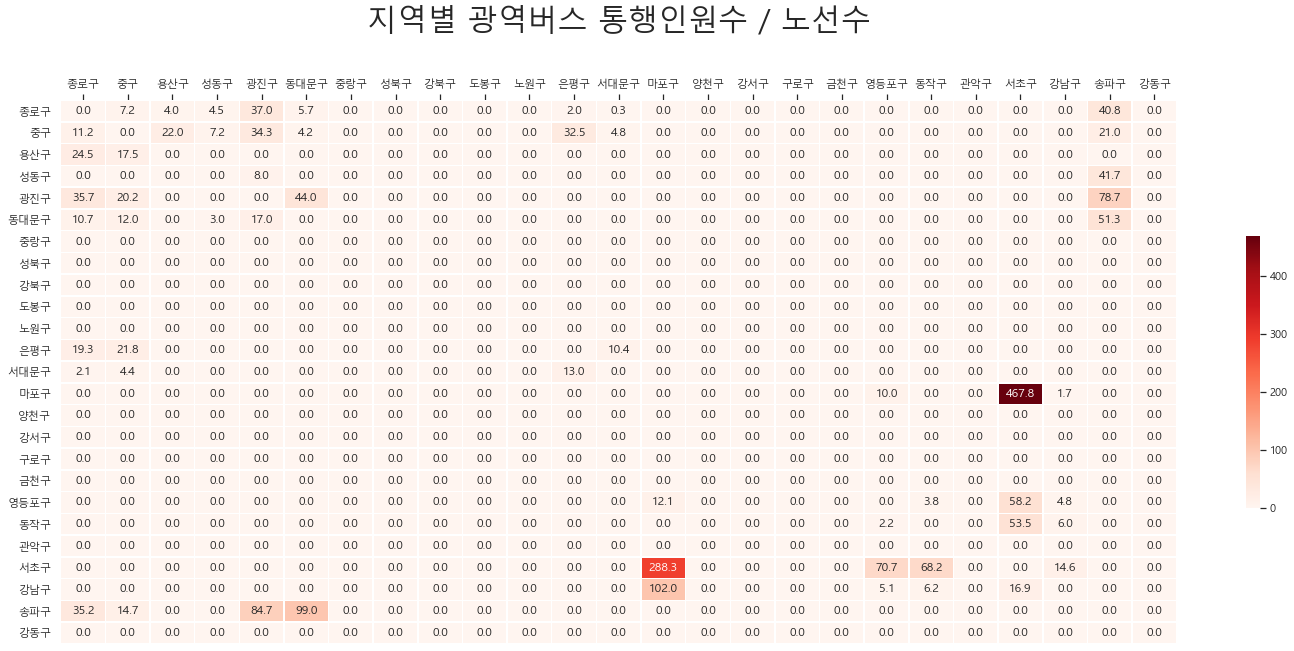

In [32]:
congestion_wide_area_data = []

for i in range(25):
    tmp = []
    for j in range(25):
        if wide_area_passenger_data[i][j] == 0.0 or wide_area_route_data[i][j] == 0:
            tmp.append(0.0)
            continue
        res = round(wide_area_passenger_data[i][j] / wide_area_route_data[i][j],3)
        tmp.append(res)
    congestion_wide_area_data.append(tmp)
    

    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

wide_area_cong_df = pd.DataFrame(congestion_wide_area_data, index = d, columns = d)


plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(wide_area_cong_df, annot = True, cmap = "Reds", fmt='.1f', linewidth = 0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 광역버스 통행인원수 / 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

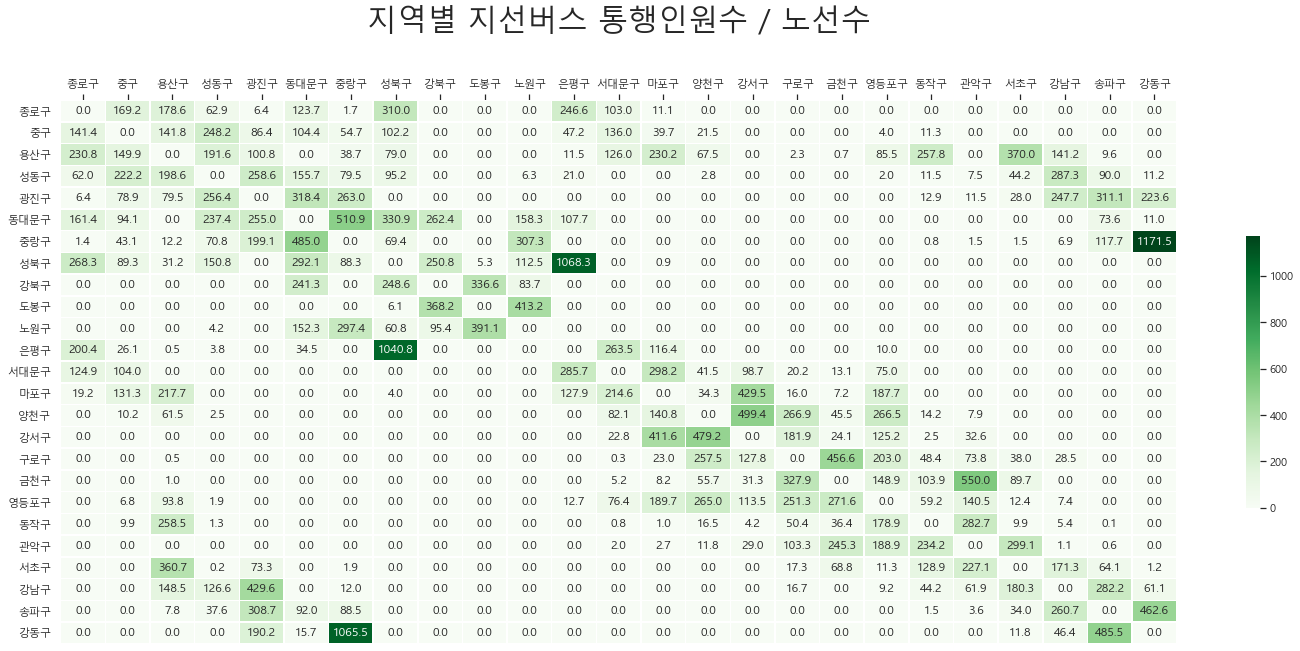

In [33]:
congestion_branch_data = []

for i in range(25):
    tmp = []
    for j in range(25):
        if branch_passenger_data[i][j] == 0.0 or branch_route_data[i][j] == 0:
            tmp.append(0.0)
            continue
        res = round(branch_passenger_data[i][j] / branch_route_data[i][j],3)
        tmp.append(res)
    congestion_branch_data.append(tmp)
    

    
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)

branch_cong_df = pd.DataFrame(congestion_branch_data, index = d, columns = d)


plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(branch_cong_df, annot = True, cmap = "Greens", fmt='.1f', linewidth = 0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 지선버스 통행인원수 / 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

In [191]:
def rank_calc(route, passenger):
    bus_congestion = {}
    for i in range(len(districts)):
        for j in range(len(districts)):
            bus_congestion[districts[i] + '-' + districts[j]] = 0

    for key in route:
        if route[key] == 0 or passenger[key] == 0.0:
            bus_congestion[key] = 0.0
        else:
            value = round(passenger[key] / route[key], 3)
            bus_congestion[key] = value

    bus_most_traffic = sorted(bus_congestion.items(), key=operator.itemgetter(1), reverse=True)
    for i in range(len(bus_most_traffic)):
        bus_most_traffic[i] = list(bus_most_traffic[i])

    for i in range(len(bus_most_traffic)):
        o1 = bus_most_traffic[i][0].split('-')[0]
        d1 = bus_most_traffic[i][0].split('-')[1]
        for j in range(i+1, len(bus_most_traffic)):
            o2 = bus_most_traffic[j][0].split('-')[0]
            d2 = bus_most_traffic[j][0].split('-')[1]
            if o1 == d2 and d1 == o2:
                bus_most_traffic[i][1] += bus_most_traffic[j][1]
                bus_most_traffic[i][1] = round(bus_most_traffic[i][1], 2)
                bus_most_traffic[j][1] = 0.0

    bus_most_traffic.sort(key=lambda x:-x[1])
    top5_section = []
    top5_figure = []

    for i in range(5):
        top5_section.append(bus_most_traffic[i][0])
        top5_figure.append(bus_most_traffic[i][1])

    top5_section.reverse()
    top5_figure.reverse()

    return top5_section, top5_figure

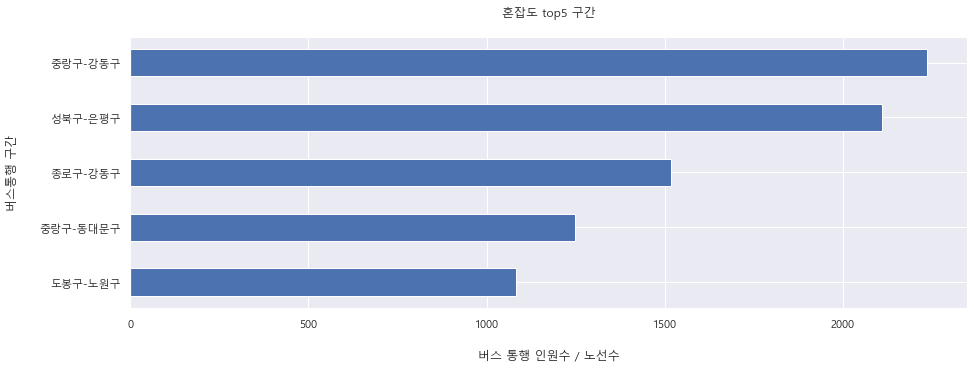

In [193]:
section, figure = rank_calc(dic, dic2)

plt.rcParams["figure.figsize"] = (15, 5)
plt.barh(section, figure, height=0.5)
plt.title("혼잡도 top5 구간", pad=20)
plt.xlabel("버스 통행 인원수 / 노선수", labelpad=20)
plt.ylabel("버스통행 구간", labelpad=20)
plt.show()

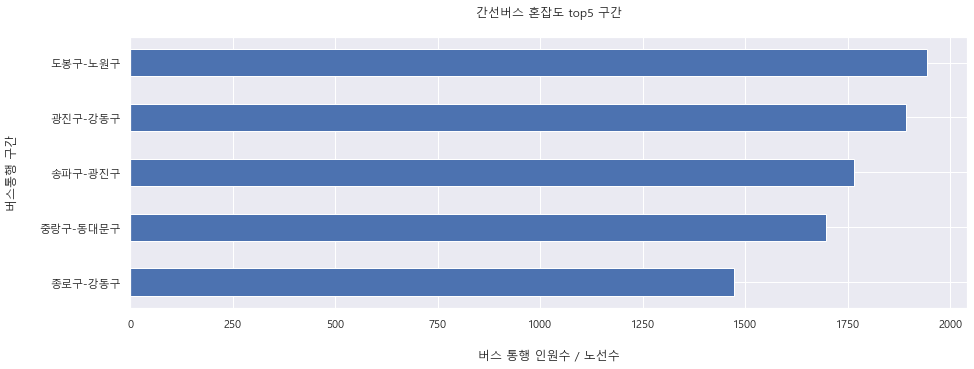

In [194]:
section, figure = rank_calc(trunk_dic, trunk_table)

plt.rcParams["figure.figsize"] = (15, 5)
plt.barh(section, figure, height=0.5)
plt.title("간선버스 혼잡도 top5 구간", pad=20)
plt.xlabel("버스 통행 인원수 / 노선수", labelpad=20)
plt.ylabel("버스통행 구간", labelpad=20)
plt.show()

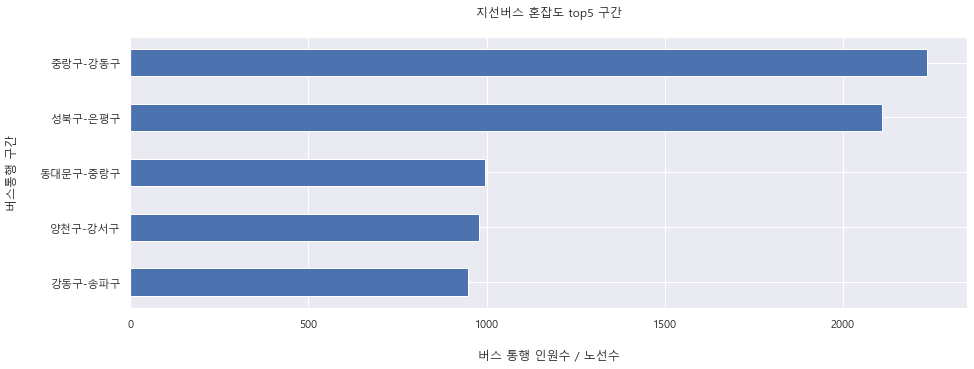

In [195]:
section, figure = rank_calc(branch_dic, branch_table)

plt.rcParams["figure.figsize"] = (15, 5)
plt.barh(section, figure, height=0.5)
plt.title("지선버스 혼잡도 top5 구간", pad=20)
plt.xlabel("버스 통행 인원수 / 노선수", labelpad=20)
plt.ylabel("버스통행 구간", labelpad=20)
plt.show()

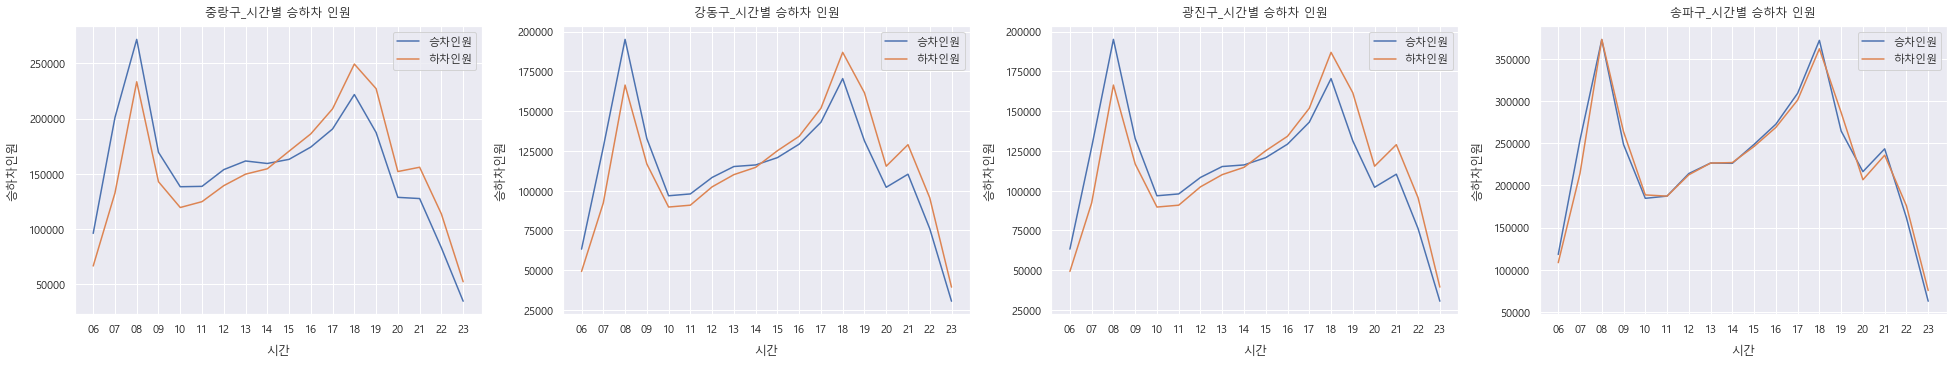

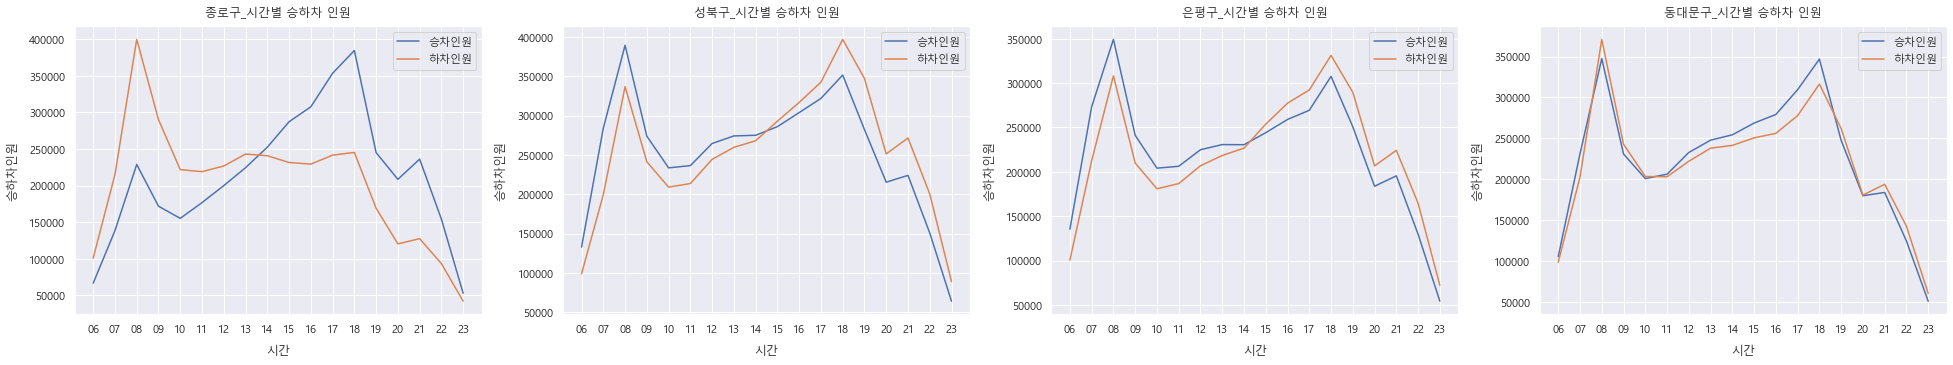

In [56]:
f9 = pd.read_csv("routes_time_inout_all.csv", dtype='str', encoding='cp949')
f9.columns = ["date", "route_id", "ars_id", "station_name", "geton_6", "getoff_6", "geton_7", "getoff_7", "geton_8", "getoff_8", "geton_9", "getoff_9", "geton_10", "getoff_10", "geton_11", "getoff_11", "geton_12", "getoff_12", "geton_13", "getoff_13", "geton_14", "getoff_14", "geton_15", "getoff_15", "geton_16", "getoff_16", "geton_17", "getoff_17", "geton_18", "getoff_18", "geton_19", "getoff_19", "geton_20", "getoff_20", "geton_21", "getoff_21", "geton_22", "getoff_22", "geton_23", "getoff_23"]

def get_district2(arsid):
    if len(arsid) == 4:
        prefix = arsid[:1]
    elif len(arsid) == 5:
        prefix = arsid[:2]
    idx = int(prefix) - 1
    return districts[idx]

districts = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]
distriction_time_onoff_cnt = {}

for d in districts:
    distriction_time_onoff_cnt[d] = [[0] * 18,[0] * 18]


for i in range(len(f9)):
    route_id = f9.route_id[i]
    ars_id = f9.ars_id[i]
    if route_id.startswith('N'):
        continue
    if ars_id == '~':
        continue
    if len(ars_id) == 5:
        if int(ars_id[:2]) > 25:
            continue
    district = get_district2(ars_id)
    """
    distriction_time_onoff_cnt[district][0] --> 자치구별_시간별_승차인원
    distriction_time_onoff_cnt[district][1] --> 자치구별_시간별_하차인원
    """
    distriction_time_onoff_cnt[district][0][0] += int(f9.geton_6[i])
    distriction_time_onoff_cnt[district][0][1] += int(f9.geton_7[i])
    distriction_time_onoff_cnt[district][0][2] += int(f9.geton_8[i])
    distriction_time_onoff_cnt[district][0][3] += int(f9.geton_9[i])
    distriction_time_onoff_cnt[district][0][4] += int(f9.geton_10[i])
    distriction_time_onoff_cnt[district][0][5] += int(f9.geton_11[i])
    distriction_time_onoff_cnt[district][0][6] += int(f9.geton_12[i])
    distriction_time_onoff_cnt[district][0][7] += int(f9.geton_13[i])
    distriction_time_onoff_cnt[district][0][8] += int(f9.geton_14[i])
    distriction_time_onoff_cnt[district][0][9] += int(f9.geton_15[i])
    distriction_time_onoff_cnt[district][0][10] += int(f9.geton_16[i])
    distriction_time_onoff_cnt[district][0][11] += int(f9.geton_17[i])
    distriction_time_onoff_cnt[district][0][12] += int(f9.geton_18[i])
    distriction_time_onoff_cnt[district][0][13] += int(f9.geton_19[i])
    distriction_time_onoff_cnt[district][0][14] += int(f9.geton_20[i])
    distriction_time_onoff_cnt[district][0][15] += int(f9.geton_21[i])
    distriction_time_onoff_cnt[district][0][16] += int(f9.geton_22[i])
    distriction_time_onoff_cnt[district][0][17] += int(f9.geton_23[i])
    
    distriction_time_onoff_cnt[district][1][0] += int(f9.getoff_6[i])
    distriction_time_onoff_cnt[district][1][1] += int(f9.getoff_7[i])
    distriction_time_onoff_cnt[district][1][2] += int(f9.getoff_8[i])
    distriction_time_onoff_cnt[district][1][3] += int(f9.getoff_9[i])
    distriction_time_onoff_cnt[district][1][4] += int(f9.getoff_10[i])
    distriction_time_onoff_cnt[district][1][5] += int(f9.getoff_11[i])
    distriction_time_onoff_cnt[district][1][6] += int(f9.getoff_12[i])
    distriction_time_onoff_cnt[district][1][7] += int(f9.getoff_13[i])
    distriction_time_onoff_cnt[district][1][8] += int(f9.getoff_14[i])
    distriction_time_onoff_cnt[district][1][9] += int(f9.getoff_15[i])
    distriction_time_onoff_cnt[district][1][10] += int(f9.getoff_16[i])
    distriction_time_onoff_cnt[district][1][11] += int(f9.getoff_17[i])
    distriction_time_onoff_cnt[district][1][12] += int(f9.getoff_18[i])
    distriction_time_onoff_cnt[district][1][13] += int(f9.getoff_19[i])
    distriction_time_onoff_cnt[district][1][14] += int(f9.getoff_20[i])
    distriction_time_onoff_cnt[district][1][15] += int(f9.getoff_21[i])
    distriction_time_onoff_cnt[district][1][16] += int(f9.getoff_22[i])
    distriction_time_onoff_cnt[district][1][17] += int(f9.getoff_23[i])
    

x = np.arange(18)
times = []
for i in range(6, 24):
    if len(str(i)) == 1:
        i = '0' + str(i)
    times.append(str(i))
junrang_geton_cnt = distriction_time_onoff_cnt["중랑구"][0]
junrang_getoff_cnt = distriction_time_onoff_cnt["중랑구"][1]

plt.rcParams["figure.figsize"] = (20, 5)


plt.subplot(141)
plt.title("중랑구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, junrang_geton_cnt)
plt.plot(times, junrang_getoff_cnt)
plt.legend(["승차인원", "하차인원"])

gd_geton_cnt = distriction_time_onoff_cnt["강동구"][0]
gd_getoff_cnt = distriction_time_onoff_cnt["강동구"][1]

plt.subplot(142)
plt.title("강동구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, gj_geton_cnt)
plt.plot(times, gj_getoff_cnt)
plt.legend(["승차인원", "하차인원"])


gj_geton_cnt = distriction_time_onoff_cnt["광진구"][0]
gj_getoff_cnt = distriction_time_onoff_cnt["광진구"][1]

plt.subplot(143)
plt.title("광진구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, gj_geton_cnt)
plt.plot(times, gj_getoff_cnt)
plt.legend(["승차인원", "하차인원"])

sp_geton_cnt = distriction_time_onoff_cnt["송파구"][0]
sp_getoff_cnt = distriction_time_onoff_cnt["송파구"][1]

plt.subplot(144)
plt.title("송파구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, sp_geton_cnt)
plt.plot(times, sp_getoff_cnt)
plt.legend(["승차인원", "하차인원"])


plt.subplots_adjust(left=0.3, bottom=0.1,  right=1.6, top=0.9, wspace=0.2, hspace=0.3)
plt.show()

jr_geton_cnt = distriction_time_onoff_cnt["종로구"][0]
jr_getoff_cnt = distriction_time_onoff_cnt["종로구"][1]

plt.subplot(141)
plt.title("종로구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, jr_geton_cnt)
plt.plot(times, jr_getoff_cnt)
plt.legend(["승차인원", "하차인원"])


sb_geton_cnt = distriction_time_onoff_cnt["성북구"][0]
sb_getoff_cnt = distriction_time_onoff_cnt["성북구"][1]

plt.subplot(142)
plt.title("성북구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, sb_geton_cnt)
plt.plot(times, sb_getoff_cnt)
plt.legend(["승차인원", "하차인원"])


yp_geton_cnt = distriction_time_onoff_cnt["은평구"][0]
yp_getoff_cnt = distriction_time_onoff_cnt["은평구"][1]

plt.subplot(143)
plt.title("은평구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, yp_geton_cnt)
plt.plot(times, yp_getoff_cnt)
plt.legend(["승차인원", "하차인원"])


ddm_geton_cnt = distriction_time_onoff_cnt["동대문구"][0]
ddm_getoff_cnt = distriction_time_onoff_cnt["동대문구"][1]

plt.subplot(144)
plt.title("동대문구_시간별 승하차 인원", pad = 10)
plt.xlabel("시간", labelpad = 10)
plt.ylabel("승하차인원", labelpad = 10)

plt.plot(times, ddm_geton_cnt)
plt.plot(times, ddm_getoff_cnt)
plt.legend(["승차인원", "하차인원"])


plt.subplots_adjust(left=0.3, bottom=0.1,  right=1.6, top=0.9, wspace=0.2, hspace=0.3)
plt.show()

In [44]:
dis_subst = pd.read_csv("seoul_district_subway_station.csv", dtype='str')
dis_subst.columns = ["line", "station", "district"]

dist_subst_table = {"종로구": [], "중구": [], "용산구": [], "성동구": [], "광진구": [],"동대문구": [], "중랑구": [], "성북구": [], "강북구": [],
                   "도봉구": [], "노원구": [], "은평구": [], "서대문구": [], "마포구": [], "양천구": [], "강서구": [], "구로구": [], "금천구": [], "영등포구": [], "동작구": [],
                   "관악구": [], "서초구": [], "강남구": [], "송파구": [], "강동구": []}



for i in range(len(dis_subst)):
    district_name = dis_subst.district[i]
    station_name = dis_subst.station[i]
    if "종로" in district_name:
        dist_subst_table["종로구"].append(station_name)
    elif "중구" in district_name:
        dist_subst_table["중구"].append(station_name)
    elif "용산" in district_name:
        dist_subst_table["용산구"].append(station_name)
    elif "성동" in district_name:
        dist_subst_table["성동구"].append(station_name)
    elif "광진" in district_name:
        dist_subst_table["광진구"].append(station_name)
    elif "동대문" in district_name:
        dist_subst_table["동대문구"].append(station_name)
    elif "중랑" in district_name:
        dist_subst_table["중랑구"].append(station_name)
    elif "성북" in district_name:
        dist_subst_table["성북구"].append(station_name)
    elif "강북" in district_name:
        dist_subst_table["강북구"].append(station_name)
    elif "도봉" in district_name:
        dist_subst_table["도봉구"].append(station_name)
    elif "노원" in district_name:
        dist_subst_table["노원구"].append(station_name)
    elif "은평" in district_name:
        dist_subst_table["은평구"].append(station_name)
    elif "서대문" in district_name:
        dist_subst_table["서대문구"].append(station_name)
    elif "마포" in district_name:
        dist_subst_table["마포구"].append(station_name)
    elif "양천" in district_name:
        dist_subst_table["양천구"].append(station_name)
    elif "강서" in district_name:
        dist_subst_table["강서구"].append(station_name)
    elif "구로" in district_name:
        dist_subst_table["구로구"].append(station_name)
    elif "금천" in district_name:
        dist_subst_table["금천구"].append(station_name)
    elif "영등포" in district_name:
        dist_subst_table["영등포구"].append(station_name)
    elif "동작" in district_name:
        dist_subst_table["동작구"].append(station_name)
    elif "관악" in district_name:
        dist_subst_table["관악구"].append(station_name)
    elif "서초" in district_name:
        dist_subst_table["서초구"].append(station_name)
    elif "강남" in district_name:
        dist_subst_table["강남구"].append(station_name)
    elif "송파" in district_name:
        dist_subst_table["송파구"].append(station_name)
    elif "강동" in district_name:
        dist_subst_table["강동구"].append(station_name)
        
checking_arr = sum(list(dist_subst_table.values()), [])

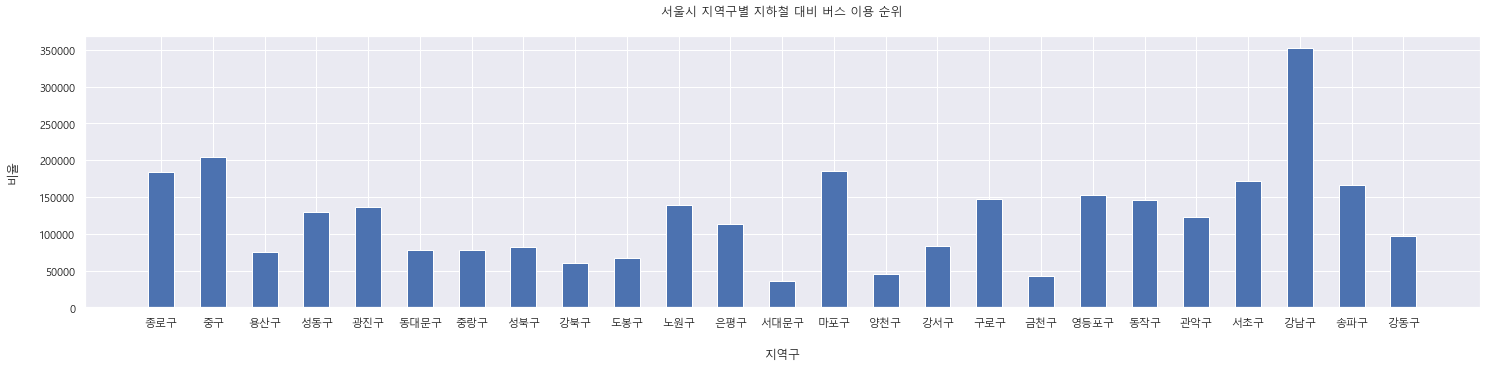

In [45]:
sub_od = pd.read_csv("sub_routes_od_20210316.csv", dtype='str',encoding='CP949')
sub_od.columns = ["date", "get_on_station", "get_off_station", "cnt"]

sub_od2 = pd.read_csv("sub_routes_od_20210216.csv", dtype='str',encoding='CP949')
sub_od2.columns = ["date", "get_on_station", "get_off_station", "cnt"]

sub_od3 = pd.read_csv("sub_routes_od_20210420.csv", dtype='str',encoding='CP949')
sub_od3.columns = ["date", "get_on_station", "get_off_station", "cnt"]

sub_od_table = {}
for i in range(len(districts)):
    for j in range(len(districts)):
        sub_od_table[districts[i] + '-' + districts[j]] = 0

def sub_operation(file):
    for i in range(len(file)):
        get_on_station = file.get_on_station[i]
        get_off_station = file.get_off_station[i]
        
        idx_on = get_on_station.find('(')
        idx_off = get_off_station.find('(')
        
        if idx_on != -1:
            get_on_station = get_on_station[:idx_on]
        if idx_off != -1:
            get_off_station = get_off_station[:idx_off]

        if get_on_station in checking_arr and get_off_station in checking_arr:
            for key in dist_subst_table:
                if get_on_station in dist_subst_table[key]:
                    ride = key
                if get_off_station in dist_subst_table[key]:
                    quit = key
            if ride == quit:
                continue
            route = f"{ride}-{quit}"
            passengers = int(file.cnt[i])
            sub_od_table[route] += passengers
            
sub_operation(sub_od)
sub_operation(sub_od2)
sub_operation(sub_od3)

for k in sub_od_table:
    sub_od_table[k] /= 3
    sub_od_table[k] = round(sub_od_table[k], 3)

sub_heatmap = []
for dist in districts:
    movings = []
    for key in sub_od_table:
        if key.startswith(dist):
            movings.append(sub_od_table[key])
    sub_heatmap.append(list(movings))
  
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)
sub_df = pd.DataFrame(sub_heatmap, index = districts, columns = districts)

sub_rank = []
for item in sub_heatmap:
    sub_rank.append(sum(item))

plt.rcParams["figure.figsize"] = (25, 5)
plt.bar(districts, sub_rank, width=0.5)
plt.title("서울시 지역구별 지하철 대비 버스 이용 순위", pad=20)
plt.xlabel("지역구", labelpad=20)
plt.ylabel("비율", labelpad=20)
plt.show()


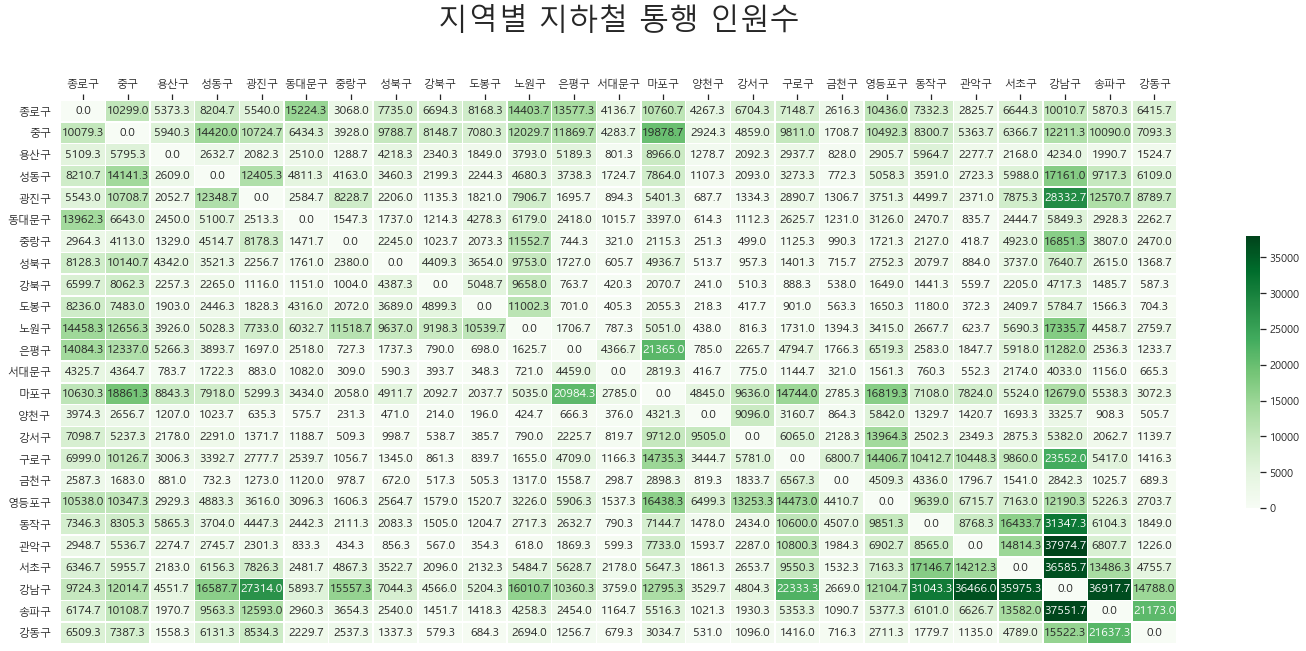

In [46]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(sub_df, annot = True, cmap="Greens", fmt='.1f', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 지하철 통행 인원수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

In [19]:
sub_most_traffic = sorted(sub_od_table.items(), key=operator.itemgetter(1), reverse=True)
print(sub_most_traffic)

('관악구-강남구', 38475)


In [52]:
sub_bus_diff_ratio = {}
for i in range(len(districts)):
    for j in range(len(districts)):
        sub_bus_diff_ratio[districts[i] + '-' + districts[j]] = 0
        
for key in dic2:
    if dic2[key] == 0.0 or sub_od_table[key] == 0:
        sub_bus_diff_ratio[key] = 0.0
    else:
        value = round(dic2[key] / sub_od_table[key], 3)
        sub_bus_diff_ratio[key] = value

diff_heatmap = []
for dist in districts:
    movings = []
    for key in sub_bus_diff_ratio:
        if key.startswith(dist):
            movings.append(sub_bus_diff_ratio[key])
    diff_heatmap.append(list(movings))
  
pd.set_option("display.max_row", 25)
pd.set_option("display.max_columns", 25)
diff_df = pd.DataFrame(diff_heatmap, index = districts, columns = districts)

# di_sum = []
# for item in diff_heatmap:
#     di_sum.append(sum(item))

# plt.rcParams["figure.figsize"] = (25, 5)
# plt.bar(districts, di_sum, width=0.5)
# plt.title("서울시 지역구별 지하철 대비 버스 이용 순위", pad=20)
# plt.xlabel("지역구", labelpad=20)
# plt.ylabel("비율", labelpad=20)
# plt.show()

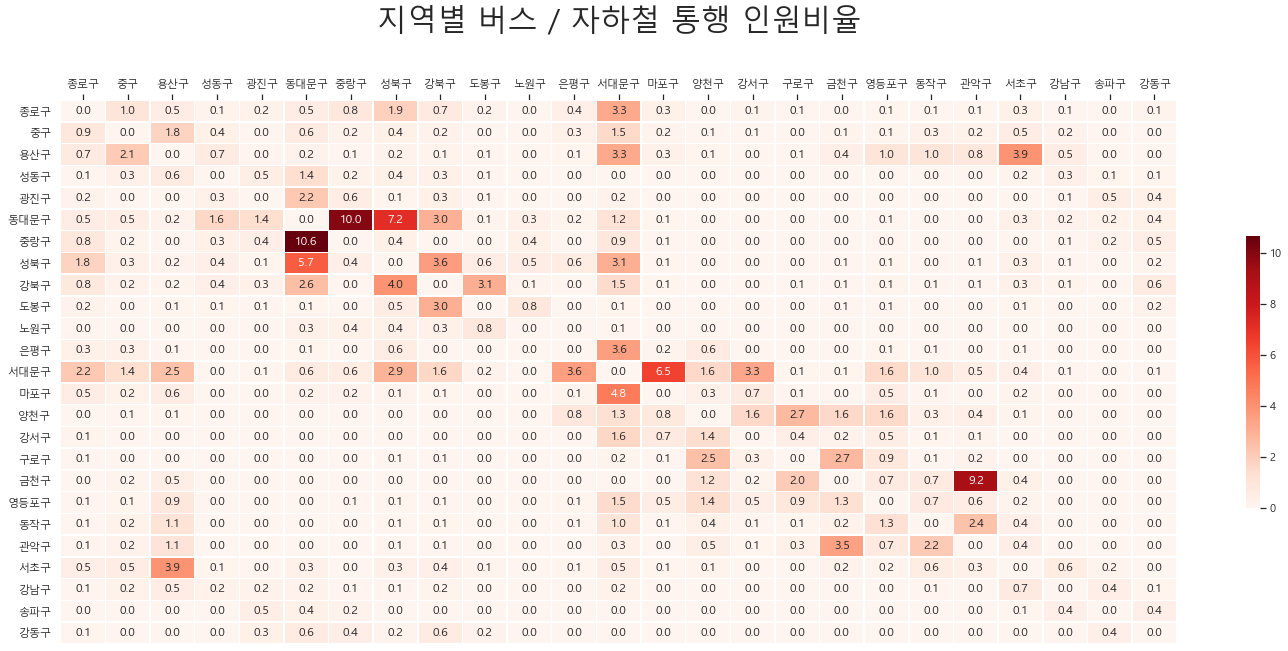

In [54]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.heatmap(diff_df, annot = True, cmap="Reds", fmt='.1f', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("지역별 버스 / 자하철 통행 인원비율",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()

In [5]:
f = pd.read_csv("seoul_bus_route.csv", dtype='str')
f.columns = ["route_id", "route_name", "index", "section_id", "station_id", "ARS_id", "station_name", "longitude", "latitude"]

trunk_bus = []      # 간선버스
branch_bus = []     # 지선버스
wide_area_bus = []  # 광역버스
circular_bus = []   # 순환버스
town_bus = []       # 마을버스


territories = [("종로구","중구","용산구"), ("도봉구","강북구","성북구","노원구"), ("동대문구","중랑구","성동구","광진구"),
               ("강동구","송파구"), ("서초구","강남구"), ("동작구","관악구","금천구"), ("강서구","양천구","영등포구","구로구"),
               ("은평구","마포구","서대문구")
              ]



for i in range(len(f)):
    only_num = ""
    if '-' in f.route_name[i] or f.route_name[i][0] == 'N':
        continue
    for char in f.route_name[i]:
        if char == 'A' or char == 'B':
            break
        only_num += char
    if len(only_num) == 2:
        if only_num not in circular_bus:
            circular_bus.append(only_num)
    elif len(only_num) == 3:
        if only_num not in trunk_bus:
            trunk_bus.append(only_num)
    elif len(only_num) == 4 and only_num[0].isdigit():
        if only_num[0] == '9':
            if only_num not in wide_area_bus:
                wide_area_bus.append(only_num)
        else:
            if only_num[-1] == '0' and only_num[-2] == '0':
                continue
            if only_num not in branch_bus:
                branch_bus.append(only_num)
    else:
        if only_num not in town_bus:
            town_bus.append(only_num)

kinds = ["간선버스", "지선버스", "광역버스", "순환버스", "마을버스"]            
kinds_num = [len(trunk_bus), len(branch_bus), len(wide_area_bus), len(circular_bus), len(town_bus)]

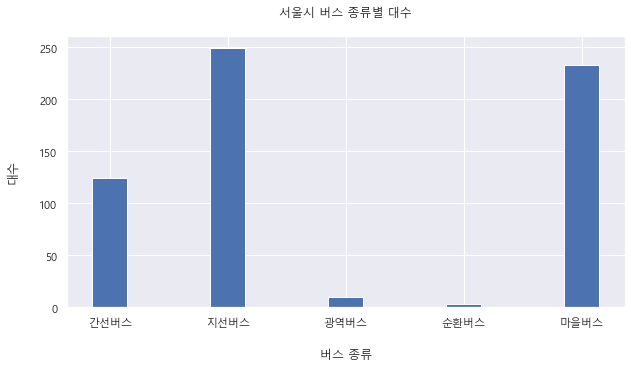

In [7]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(kinds, kinds_num, width=0.3)
plt.title("서울시 버스 종류별 대수", pad=20)
plt.xlabel("버스 종류", labelpad=20)
plt.ylabel("대수", labelpad=20)
plt.show()

In [104]:
def kinds_bus_calc(kind):
    kind_table = {}
    for i in range(len(territories)):
        front = "("
        for o in territories[i]:
                front += o + ','
        front = front[:-1]
        front += ')-'
        for j in range(len(territories)):
            back = "("
            for d in territories[j]:
                back +=  d + ','
            back = back[:-1]
            back += ')'
            kind_table[front+back] = 0

    for num in kind:
        trace = num[:2]
        o, d = int(trace[0]), int(trace[1])
        if o == 8:
            continue
        orep = territories[o][0]
        drep = territories[d][0]
        for key in kind_table:
            ods = key.split('-')
            if orep in ods[0] and drep in ods[1]:
                kind_table[key] += 1
            if drep in ods[0] and orep in ods[1]:
                kind_table[key] += 1


    kind_heatmap = []
    for terr in territories:
        movings = []
        for key in kind_table:
            ods = key.split('-')
            if terr[0] in ods[0]:
                movings.append(kind_table[key])
        kind_heatmap.append(list(movings))

    pd.set_option("display.max_row", 8)
    pd.set_option("display.max_columns", 8)
    kind_df = pd.DataFrame(kind_heatmap, index = territories, columns = territories)
    return kind_df

kind_df = kinds_bus_calc(branch_bus)

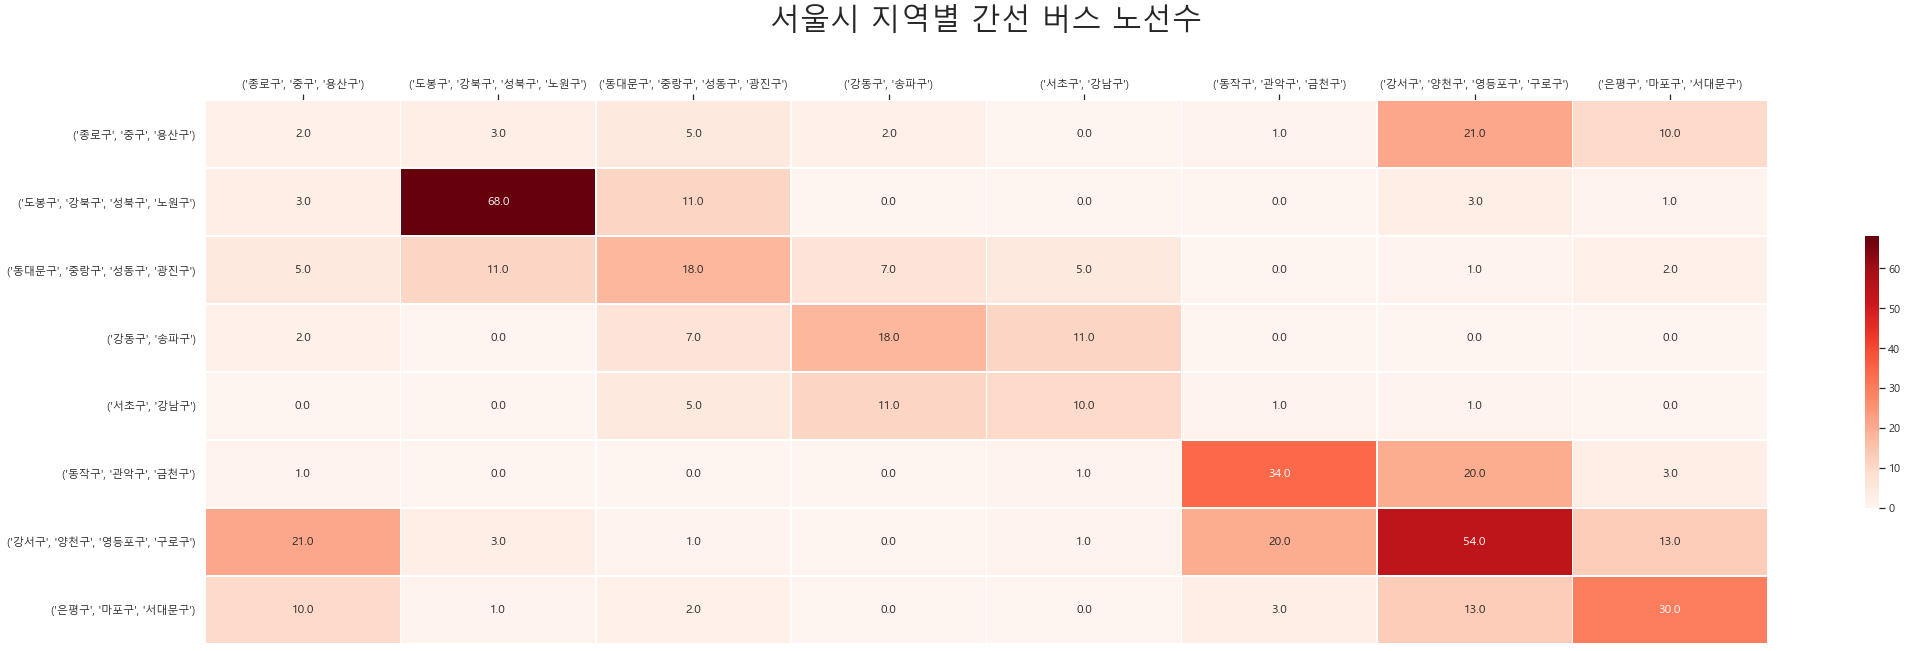

In [105]:
plt.rcParams["figure.figsize"] = (35, 10)
sns.heatmap(kind_df, annot = True, cmap="Reds", fmt='.0f', linewidth=0.5, cbar_kws={"shrink": .50, "location":"right", "use_gridspec" : False})
plt.title("서울시 지역별 간선 버스 노선수",pad=70, fontsize=30)
plt.gca().xaxis.tick_top()
plt.show()